In [56]:
%reload_ext autoreload
%autoreload 2

import os
import scipy.io as sio
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import seaborn as sns 
project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))
from scalebars import add_scalebar
import lick_behav_analysis as behav

In [57]:
fps = 15
# path = '/Users/savani/Downloads/2p_data/glp23_wd_30suc_L155P800_565um-107/glp23_wd_30suc_0_6000_250131-125059.mat'
path = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fed_d3/GRC3_fed_sucrose_20250212_0_6000_250212-112522.mat'
# behaviordata = sio.loadmat(path)
# bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(path)
paths = ['/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose/glp4_fedNoCues_L180_P815_650um-_03052024-1355-066',
          '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose/glp6_fedNoCues_L180P815_600um-03062024-1321-073',
            '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose/glp10_fed_30suc_L170P800_560um_040924-025',
          '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose/glp17_fed30suc_L150P800_565um_0613-020',
            '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose/glp23_fed_30suc_L155P800_575um-20250203-112']

paths = ['/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted 30 sucrose/glp6_fastedNoCues_L180_P815_600um-_-03092024-1421-084']

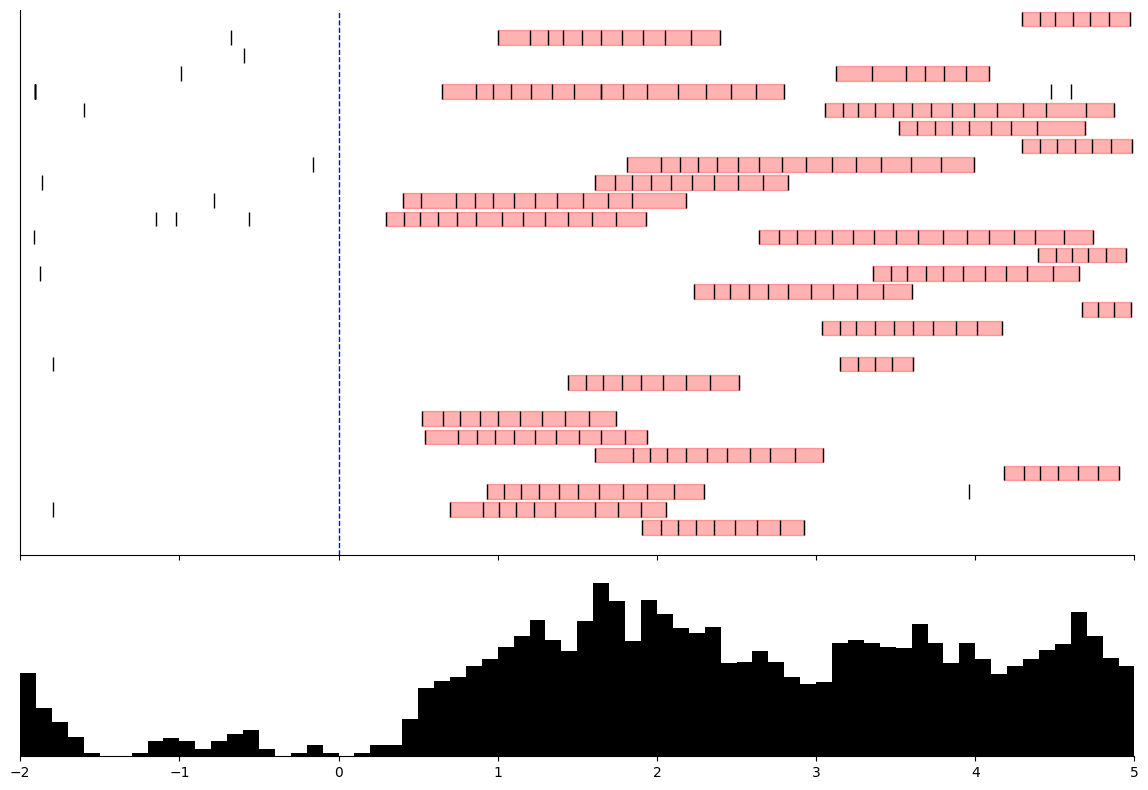

In [58]:
for path in [os.path.join(f, 'suite2p', 'plane0', 'behaviordata.mat') for f in paths]:
    fig, ax_raster, ax_psth = behav.plot_lick_raster_with_psth(
        mat_file = path,
        align_to = 'reward',
        pre_window = 5,
        post_window = 10,
        bin_size_psth = 0.1,
        smooth_psth = True,
        psth_smoothing_sigma = 0.65,
        xlabel = 'Time (s)',
        ylabel_raster = 'Trial #',
        ylabel_psth = 'Norm. Licks/sec',
        fps = 15,
        plot_bouts = True,
        multiple_tastant= False,
        filter_pre_licknum = 20,
        normalize_histo = True
    )
    ax_psth.set_xlim(left = -2, right = 5)
    ax_raster.set_ylabel("")
    ax_raster.set_yticks([])
    sns.despine(ax = ax_psth, left = True)
    ax_psth.set_yticks([])
    # plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/glp6_fasted_behavior.pdf')

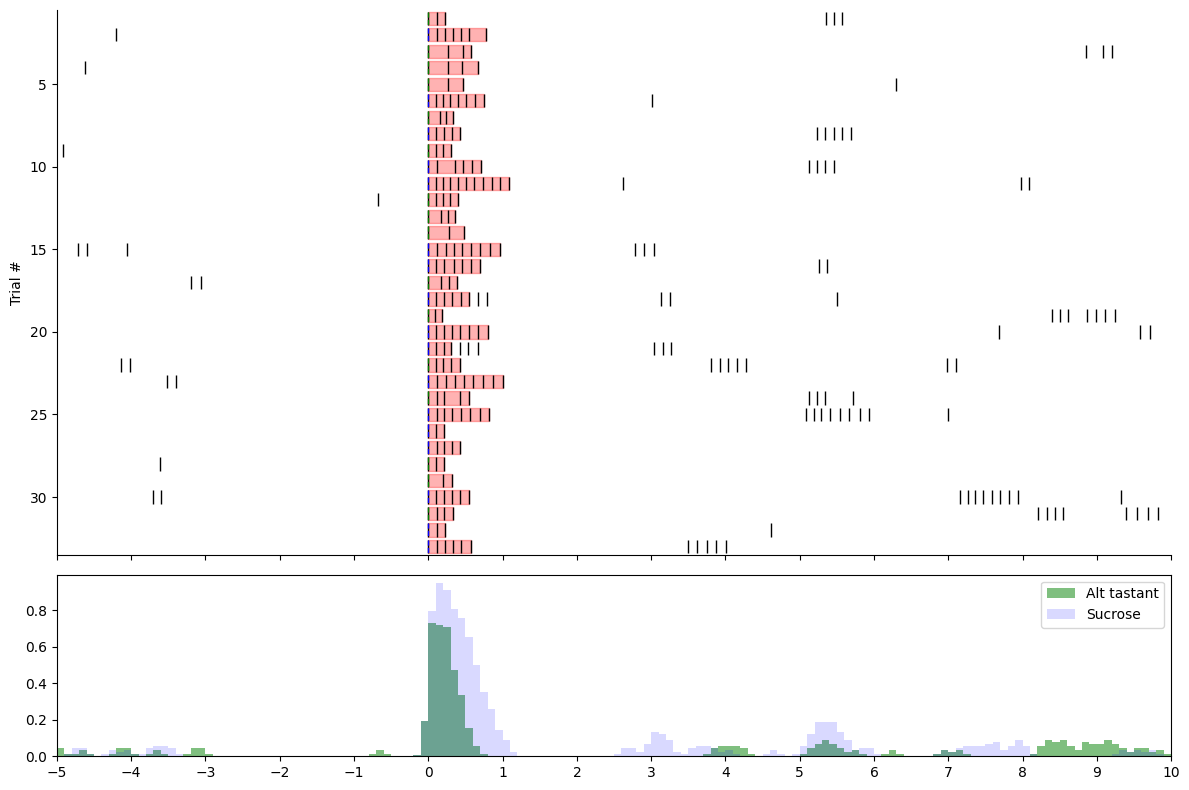

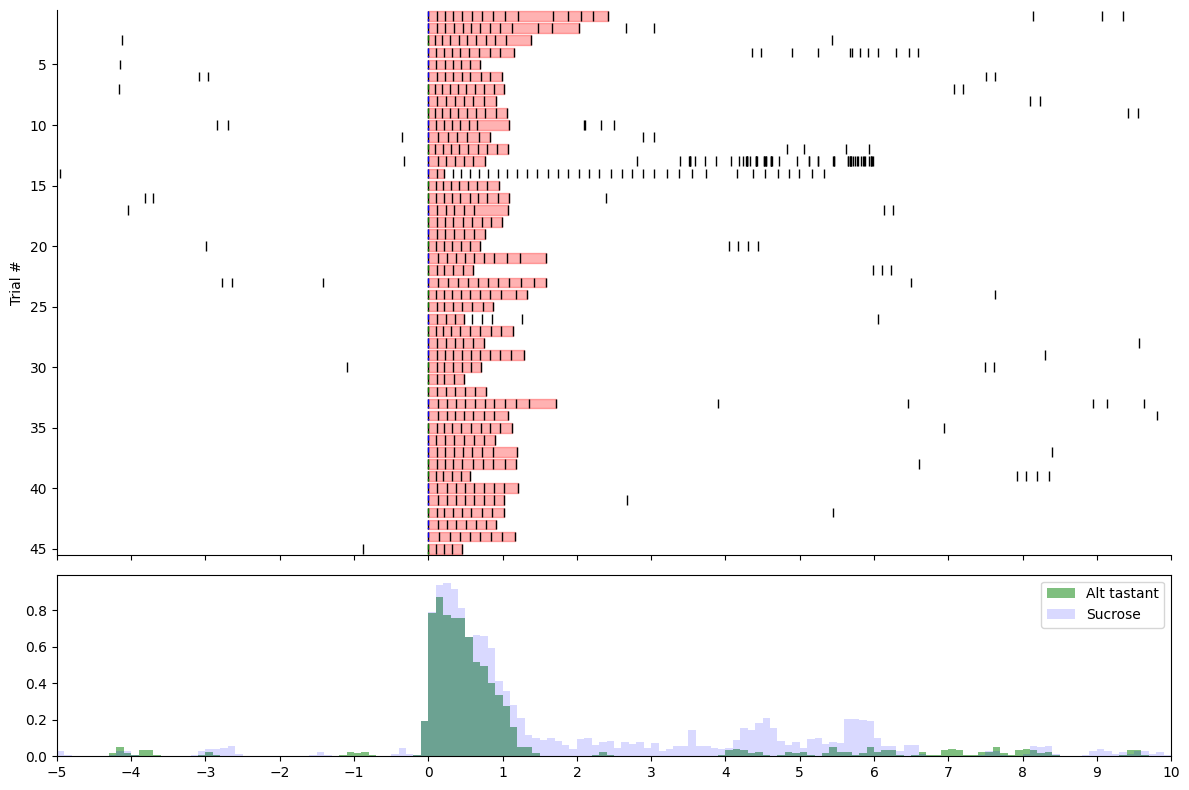

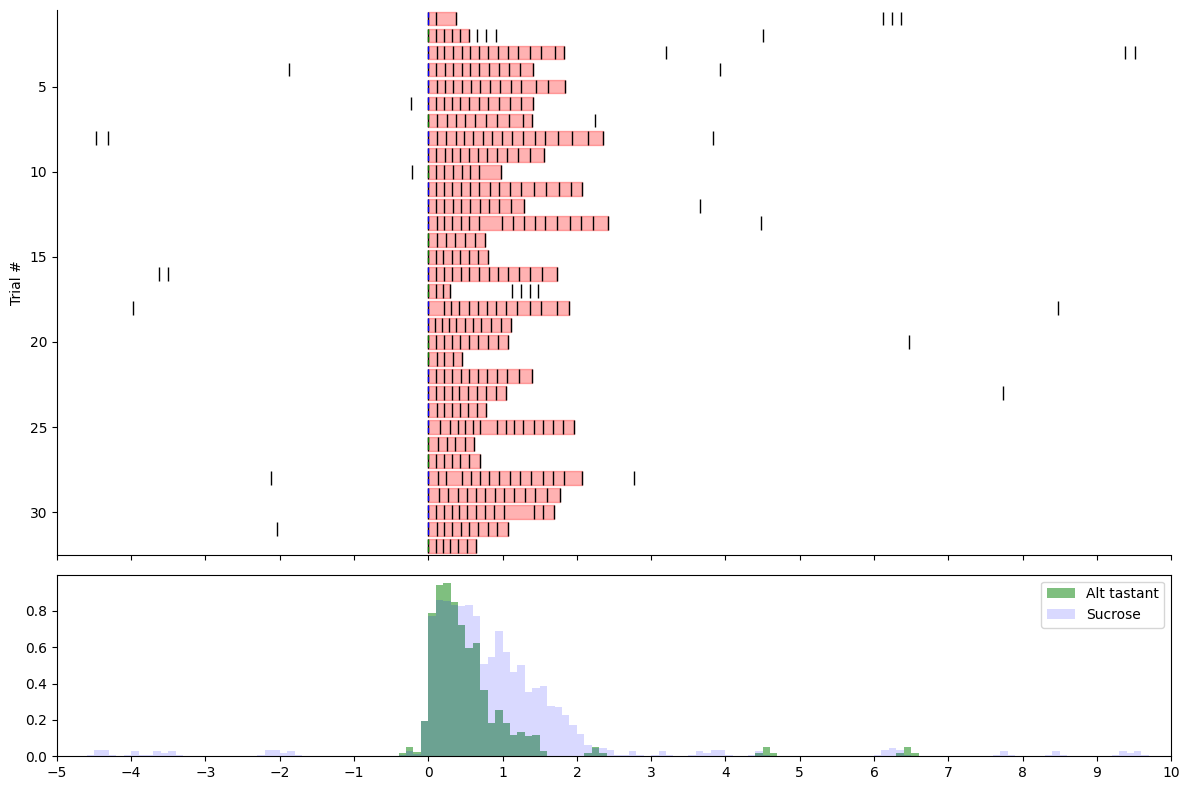

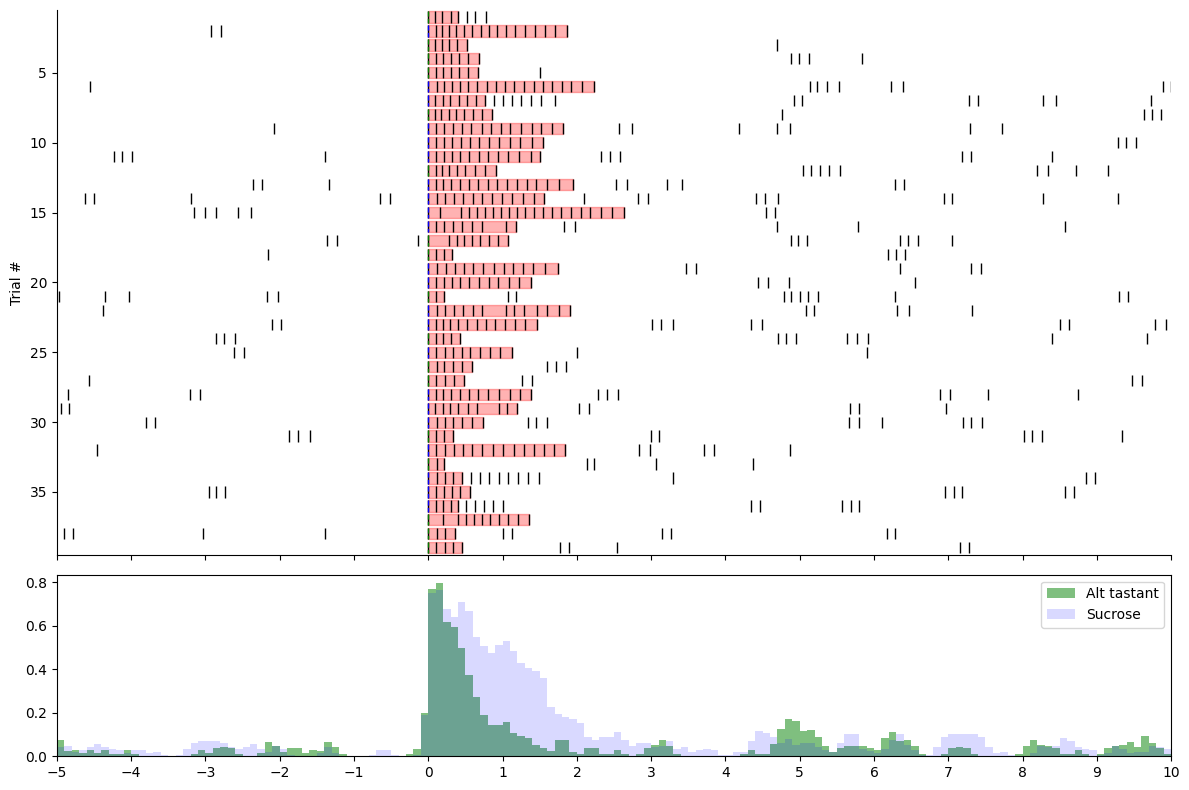

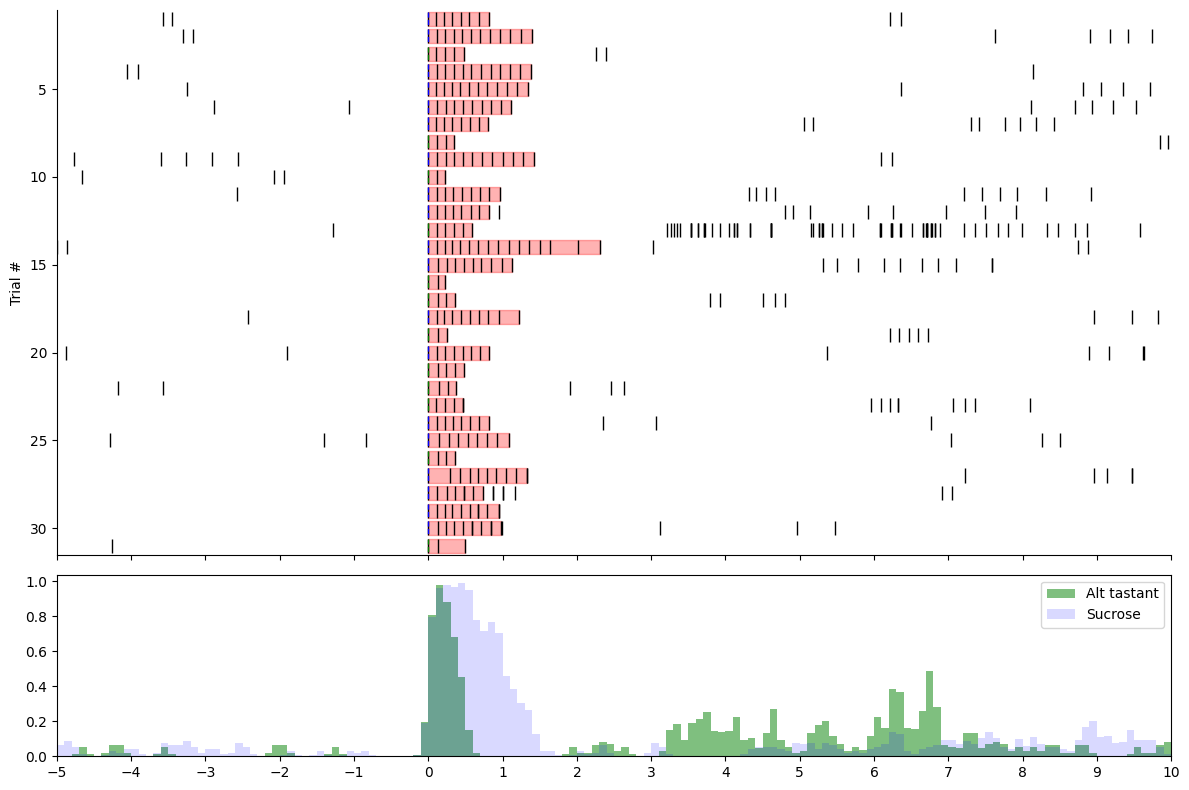

In [61]:
folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sucrose water'
for folderp in [f for f in os.listdir(folder) if not f.startswith('.')]:
    path = os.path.join(folder, folderp, 'suite2p', 'plane0', 'behaviordata.mat')
    fig, ax_raster, ax_psth = behav.plot_lick_raster_with_psth(
        mat_file = path,
        align_to = 'lick',
        pre_window = 5,
        post_window = 10,
        bin_size_psth = 0.1,
        smooth_psth = True,
        psth_smoothing_sigma = 0.65,
        xlabel = 'Time (s)',
        ylabel_raster = 'Trial #',
        ylabel_psth = 'Norm. Licks/sec',
        fps = 15,
        plot_bouts = True,
        multiple_tastant= True,
        filter_pre_licknum = 20,
        normalize_histo = True
    )
    # plt.savefig(os.path.join(folder, folderp, 'suite2p', 'plane0', 'raster_rew.pdf'), dpi=300)

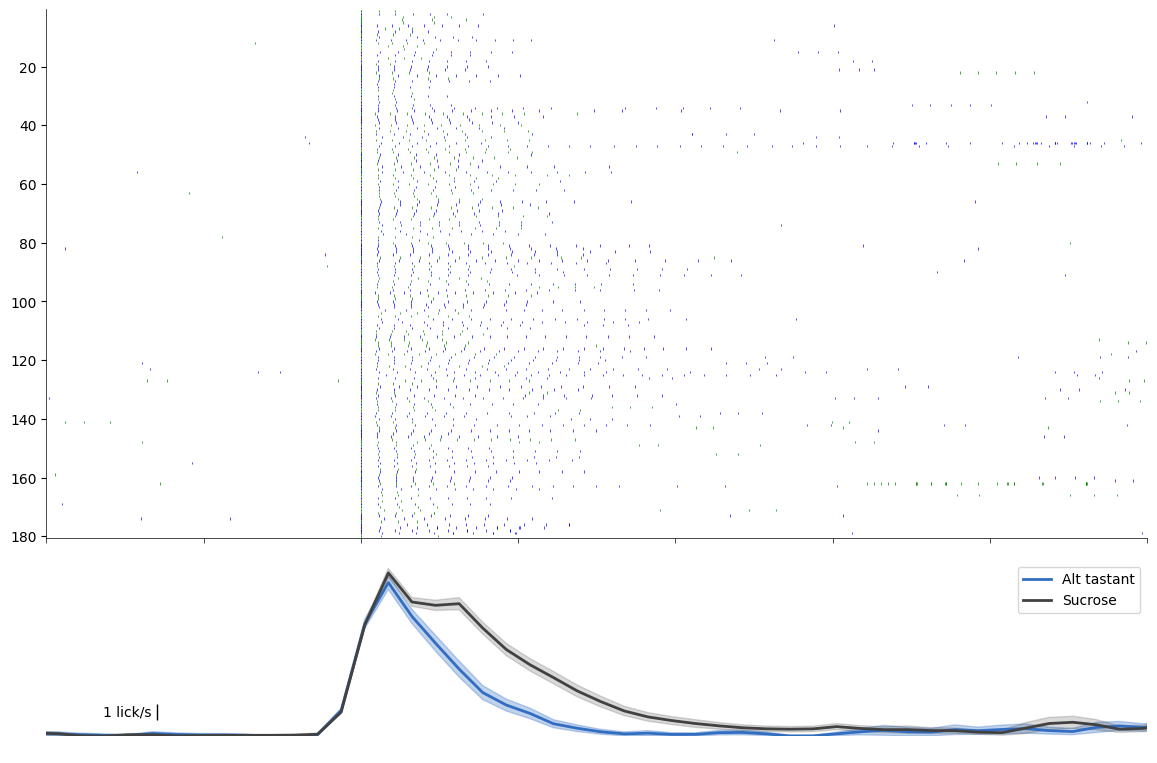

In [110]:
paths = []
folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sucrose water'
for folderp in [f for f in os.listdir(folder) if not f.startswith('.')]:
    paths.append(os.path.join(folder, folderp, 'suite2p', 'plane0', 'behaviordata.mat'))

fig, ax_raster, ax_psth = behav.plot_avg_lick_histo(
      mat_files = paths,
      align_to = 'lick',
      pre_window = 5,
      post_window = 10,
      bin_size_psth = 0.15,
      smooth_psth = True,
      psth_smoothing_sigma = 0.65,
      xlabel = 'Time (s)',
      ylabel_raster = 'Trial #',
      ylabel_psth = 'Norm. Licks/sec',
      fps = 15,
      plot_bouts = 0,
      multiple_tastant= True,
      filter_pre_licknum = 20,
      normalize_histo = False,
      lw = 0.5
)


ax_psth.set_xlim(left = -2, right = 5)

ax_raster.set_ylabel("")
# ax_raster.set_yticks([])
sns.despine(ax = ax_psth, left = True, bottom=True)
ax_psth.set_yticks([])
ax_psth.set_ylim(bottom = 0.02)
[x.set_linewidth(0.5) for x in ax_raster.spines.values()]
ax_raster.xaxis.set_tick_params(width=0.5) 
ax_psth.xaxis.set_tick_params(width=0.5) 
sb = add_scalebar(ax_psth, matchx=False, sizex=0, labelx='', matchy=False, sep=4, sizey=1, labely='1 lick/s',loc='lower left', bbox_to_anchor=(100, 40, 0.1, 0.4))
plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/sucwater_averagelickraster.pdf')

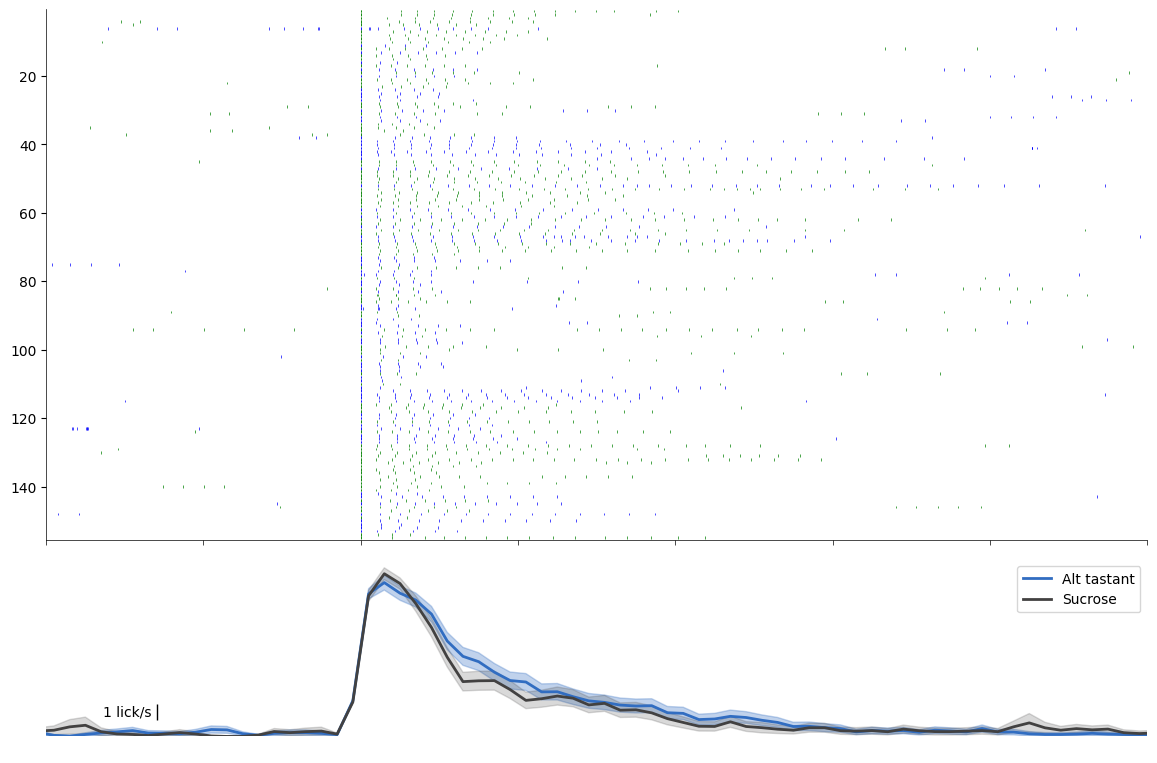

In [109]:
paths = []
folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sucrose sucralose'
for folderp in [f for f in os.listdir(folder) if not f.startswith('.')]:
    paths.append(os.path.join(folder, folderp, 'suite2p', 'plane0', 'behaviordata.mat'))

fig, ax_raster, ax_psth = behav.plot_avg_lick_histo(
      mat_files = paths,
      align_to = 'lick',
      pre_window = 5,
      post_window = 10,
      bin_size_psth = 0.1,
      smooth_psth = True,
      psth_smoothing_sigma = 0.65,
      xlabel = 'Time (s)',
      ylabel_raster = 'Trial #',
      ylabel_psth = 'Norm. Licks/sec',
      fps = 15,
      plot_bouts = 0,
      multiple_tastant= True,
      filter_pre_licknum = 20,
      normalize_histo = False,
      lw = 0.5
)
ax_psth.set_xlim(left = -2, right = 5)

ax_raster.set_ylabel("")
# ax_raster.set_yticks([])
sns.despine(ax = ax_psth, left = True, bottom=True)
ax_psth.set_yticks([])
ax_psth.set_ylim(bottom = 0.02)
[x.set_linewidth(0.5) for x in ax_raster.spines.values()]
ax_raster.xaxis.set_tick_params(width=0.5) 
ax_psth.xaxis.set_tick_params(width=0.5) 
sb = add_scalebar(ax_psth, matchx=False, sizex=0, labelx='', matchy=False, sep=4, sizey=1, labely='1 lick/s',loc='lower left', bbox_to_anchor=(100, 40, 0.1, 0.4))
plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/sucsucralose_averagelickraster.pdf')

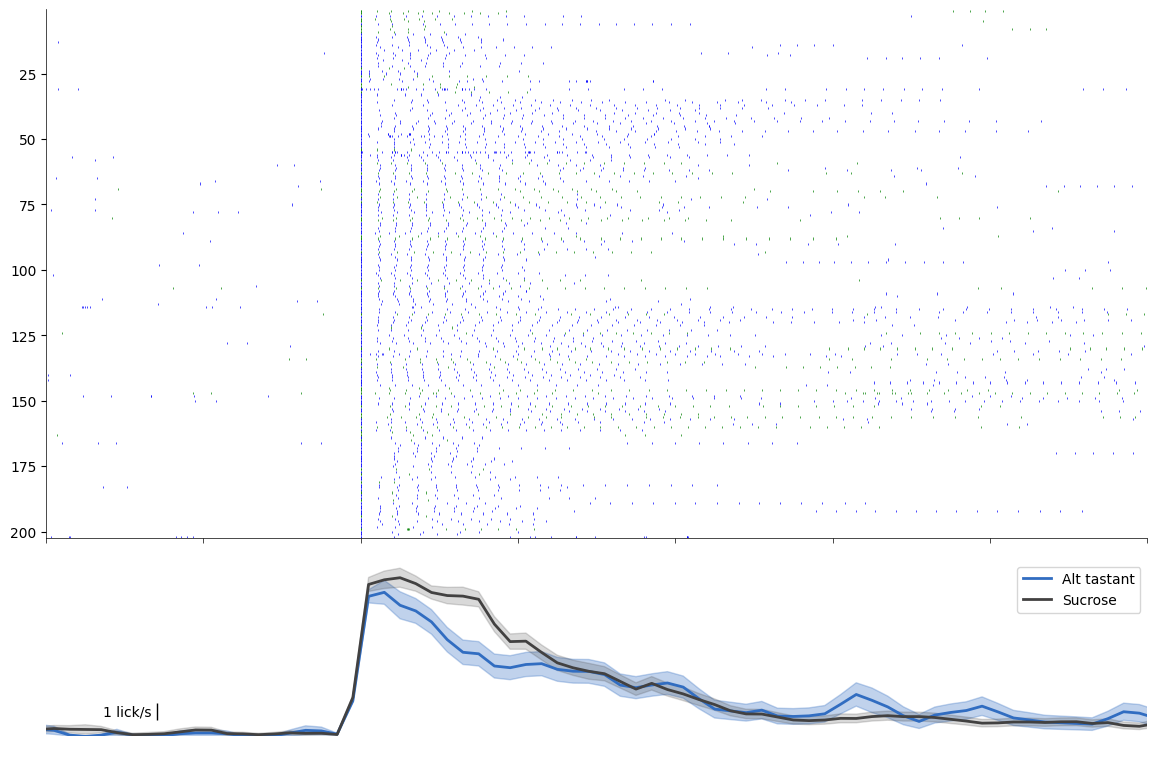

In [108]:
paths = []
folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/water deprived sucrose quinine'
for folderp in [f for f in os.listdir(folder) if not f.startswith('.')]:
    paths.append(os.path.join(folder, folderp, 'suite2p', 'plane0', 'behaviordata.mat'))

fig, ax_raster, ax_psth = behav.plot_avg_lick_histo(
      mat_files = paths,
      align_to = 'lick',
      pre_window = 5,
      post_window = 10,
      bin_size_psth = 0.1,
      smooth_psth = True,
      psth_smoothing_sigma = 0.65,
      xlabel = 'Time (s)',
      ylabel_raster = 'Trial #',
      ylabel_psth = 'Norm. Licks/sec',
      fps = 15,
      plot_bouts = 0,
      multiple_tastant= True,
      filter_pre_licknum = 20,
      normalize_histo = False,
      lw = 0.5
)
ax_psth.set_xlim(left = -2, right = 5)

ax_raster.set_ylabel("")
# ax_raster.set_yticks([])
sns.despine(ax = ax_psth, left = True, bottom=True)
ax_psth.set_yticks([])
ax_psth.set_ylim(bottom = 0.02)
[x.set_linewidth(0.5) for x in ax_raster.spines.values()]
ax_raster.xaxis.set_tick_params(width=0.5) 
ax_psth.xaxis.set_tick_params(width=0.5) 
sb = add_scalebar(ax_psth, matchx=False, sizex=0, labelx='', matchy=False, sep=4, sizey=1, labely='1 lick/s',loc='lower left', bbox_to_anchor=(100, 40, 0.1, 0.4))


plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/sucquinie_averagelickraster.pdf')

In [37]:
for x in ax_psth.spines.values():
    print(x.get_linewidth())

0.8
0.8
0.8
0.8


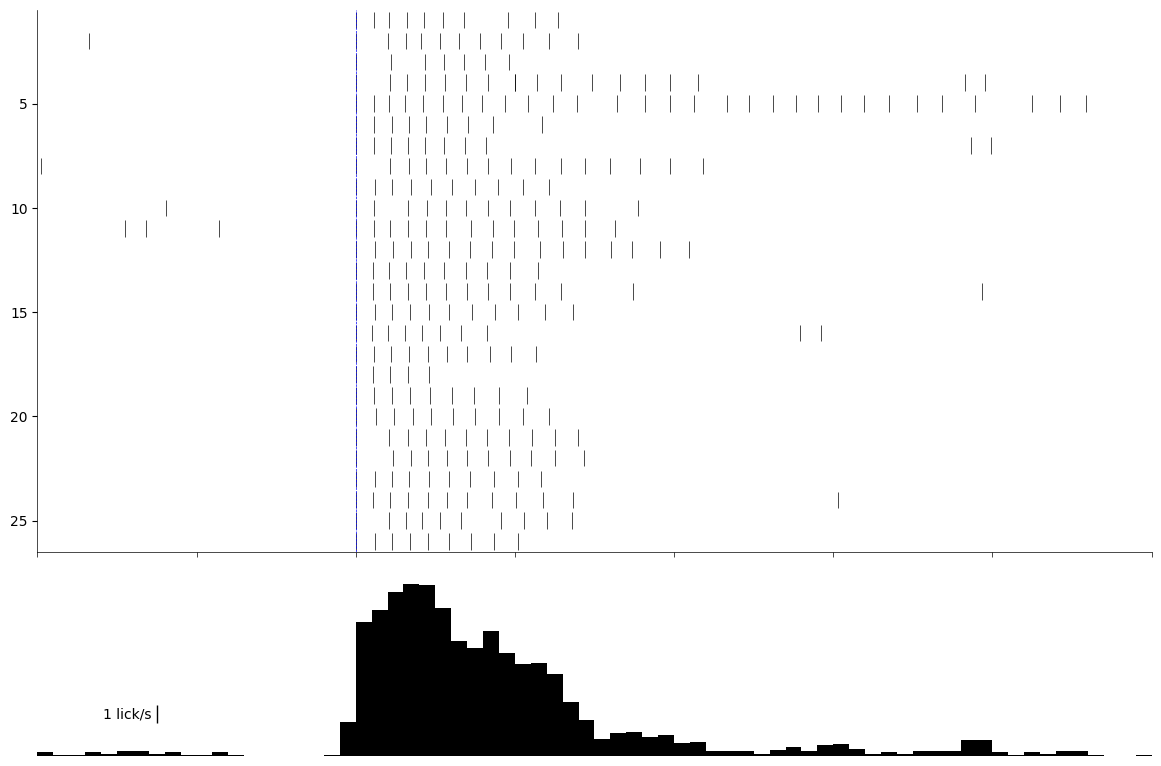

In [55]:
path = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted 30 sucrose/glp6_fastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0/behaviordata.mat'
fig, ax_raster, ax_psth = behav.plot_lick_raster_with_psth(
    mat_file = path,
    align_to = 'lick',
    pre_window = 5,
    post_window = 10,
    bin_size_psth = 0.1,
    smooth_psth = True,
    psth_smoothing_sigma = 0.65,
    xlabel = 'Time (s)',
    ylabel_raster = 'Trial #',
    ylabel_psth = 'Norm. Licks/sec',
    fps = 15,
    plot_bouts = 0,
    multiple_tastant= False,
    filter_pre_licknum = 20,
    normalize_histo = False, 
    lw = 0.5
)
ax_psth.set_xlim(left = -2, right = 5)

ax_raster.set_ylabel("")
# ax_raster.set_yticks([])
sns.despine(ax = ax_psth, left = True, bottom=True)
ax_psth.set_yticks([])
ax_psth.set_ylim(bottom = 0.02)
[x.set_linewidth(0.5) for x in ax_raster.spines.values()]
ax_raster.xaxis.set_tick_params(width=0.5) 
ax_psth.xaxis.set_tick_params(width=0.5) 
sb = add_scalebar(ax_psth, matchx=False, sizex=0, labelx='', matchy=False, sep=4, sizey=1, labely='1 lick/s',loc='lower left', bbox_to_anchor=(100, 40, 0.1, 0.4))
plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/2p/2p representative/glp6_fasted_behavior with scale.pdf')